<a href="https://colab.research.google.com/github/alek00sandra/uczenie_maszynowe/blob/main/m_l.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## **Algorytmy prezentacji danych wielowymiarowych**

Przykład 1.Wstępna ocena i analiza statystyczna danych
Wyświetlić i przeanalizować dane:
- 5 pierwszych wierszy (obiektów)
- 5 ostatnich wierszy
- etykiety kolumn i wierszy
- wymiar ramki danych
- statystykę opisową, wykorzystać:
df.describe(include = np.number) oraz
df.describe(include = object) 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = sns.load_dataset('titanic') # wczytanie zbioru TITANIC (891, 150) 891 OSOBY
df.head(5)                       #wypisuje 5 pierwszych wierszy od 0 lecimy () - LICZBA WIERSZY

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
df.tail() # zwraca 5 ostatnich wierszy


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [4]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [5]:
df.index
df.info()
df.describe()  #statystyka opisowa, tylko dane które zawierały liczby
df.describe(include = object) # ile unikalnych wartości



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


,sex,embarked,who,embark_town,alive
count,891,889,891,889,891
unique,2,3,3,3,2
top,male,S,man,Southampton,no
freq,577,644,537,644,549


Przykład 2. Identyfikacja grup pacjentów (dane o charakterze
dydaktycznym)
Zbadano siedmiu pacjentów, rejestrując dla nich parametry:
- par1, par2, par3, par4.
Wykonać wykres o równoległych osiach, których liczba jest równa
liczbie zmiennych objaśniających. Wykorzystać funkcję
**parallel_coordinates** z modułu **plotly.express**.


In [7]:
import pandas as pd
import plotly.express as px

df = pd.read_csv("pacjent.txt", delim_whitespace=True, header=0)

print(df.head()) # podgląd danych – początkowe 5 wierszy
fig = px.parallel_coordinates(df, dimensions=df.columns[0:4], color = 'group')
fig.show()

   par1  par2  par3  par4  group
0   7.9  12.1   2.1  19.1     10
1   9.4  13.4   1.9  18.8     10
2   8.5  11.8   1.7  21.1     10
3   1.2   3.7   6.3  55.2     30
4   8.8  14.3   7.7  58.4     20


 wykres macierzowy korzystając z funkcji **scatter_matrix** z
modułu plotly.express oraz **pairplot** z biblioteki **seaborn**

In [8]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
fig = px.scatter_matrix(df,dimensions=df.columns[0:4],color='group')
fig.show()

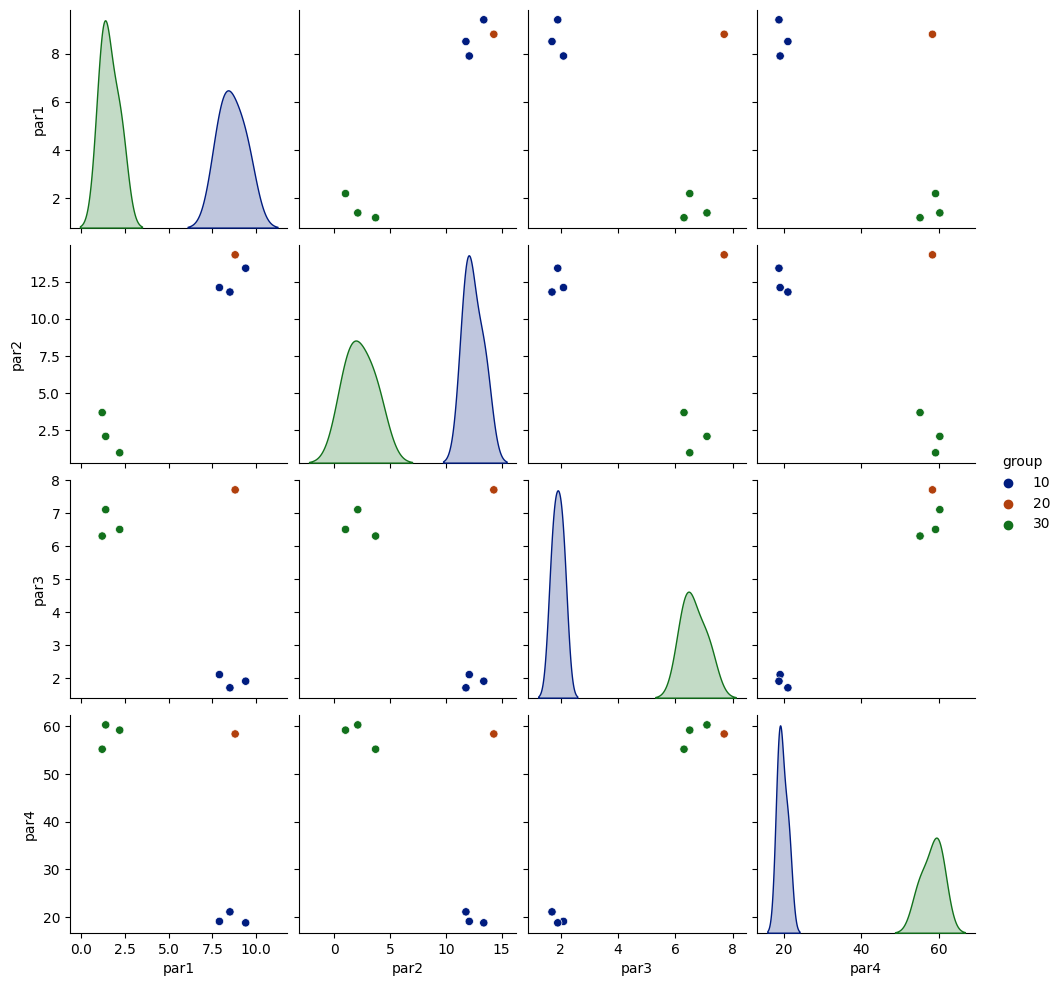

In [10]:
sns.pairplot(df, hue='group', palette='dark')
plt.show()

# Algorytmy grupowania obiektów (bez nadzoru): cluster analysis

Przykład 1. Obliczanie macierzy odległości:
Zbadano siedmiu pacjentów, rejestrując dla nich parametry:
-par1, par2, par3, par4.

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import DistanceMetric

# wczytanie i podgląd danych
df = pd.read_csv("/content/pacjent.txt", delim_whitespace=True, header=0)
print(df.head(7))

#wybór funkcji odległości
dist = DistanceMetric.get_metric('euclidean') #dist tam struktura umożliwiająca obiczanie odległości #metryka eukalidusowa

# obliczanie macierzy odległości
dm = dist.pairwise(df) #dm macierz odległości pomiędzy parami obiektów
#mamierz kwadratowa 7x7 #df.head(7)

   par1  par2  par3  par4  group
0   7.9  12.1   2.1  19.1     10
1   9.4  13.4   1.9  18.8     10
2   8.5  11.8   1.7  21.1     10
3   1.2   3.7   6.3  55.2     30
4   8.8  14.3   7.7  58.4     20
5   2.2   1.0   6.5  59.2     30
6   1.4   2.1   7.1  60.3     30


 macierz odległości w **formie numerycznej**
(formatowanie macierzy – można wykorzystać np.
n**p.set_printoptions(precision=2))**

In [12]:
np.set_printoptions(precision =2) #na przekątnej zawsze 0 macierz odległości
dm

array([[ 0.  ,  2.02,  2.15, 42.85, 41.01, 46.72, 47.59],
       [ 2.02,  0.  ,  2.95, 43.65, 41.27, 47.53, 48.38],
       [ 2.15,  2.95,  0.  , 41.27, 39.16, 45.07, 45.94],
       [42.85, 43.65, 41.27,  0.  , 16.8 ,  4.93,  5.41],
       [41.01, 41.27, 39.16, 16.8 ,  0.  , 17.96, 17.54],
       [46.72, 47.53, 45.07,  4.93, 17.96,  0.  ,  1.85],
       [47.59, 48.38, 45.94,  5.41, 17.54,  1.85,  0.  ]])

 macierz w formie **mapy cieplnej (sns.heatmap(dm))**

<Axes: >

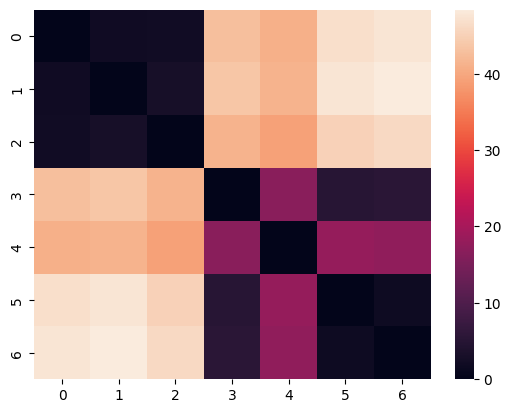

In [13]:
sns.heatmap(dm) #macierz cieplna
# 0 czarne więc na przekątnej czarne kwadraty
#obiekt (0,6) - jasny, więc duża bardzo odległość
#0 brak danych, najniższe wartości


Przykład 2. Detekcja skupień w grupie pacjentów (dane o charakterze
dydaktycznym)

   par1  par2  par3  par4  group
0   7.9  12.1   2.1  19.1     10
1   9.4  13.4   1.9  18.8     10
2   8.5  11.8   1.7  21.1     10
3   1.2   3.7   6.3  55.2     30
4   8.8  14.3   7.7  58.4     20


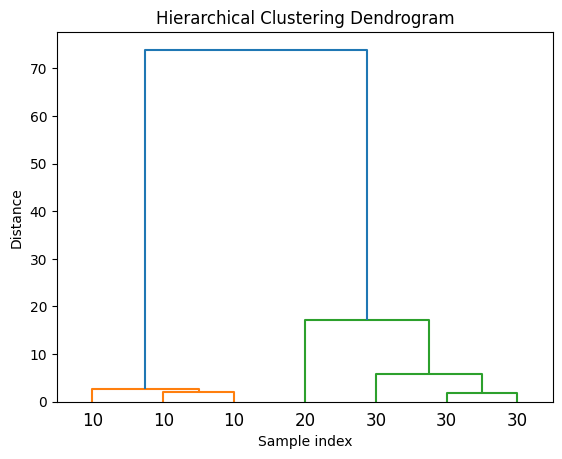

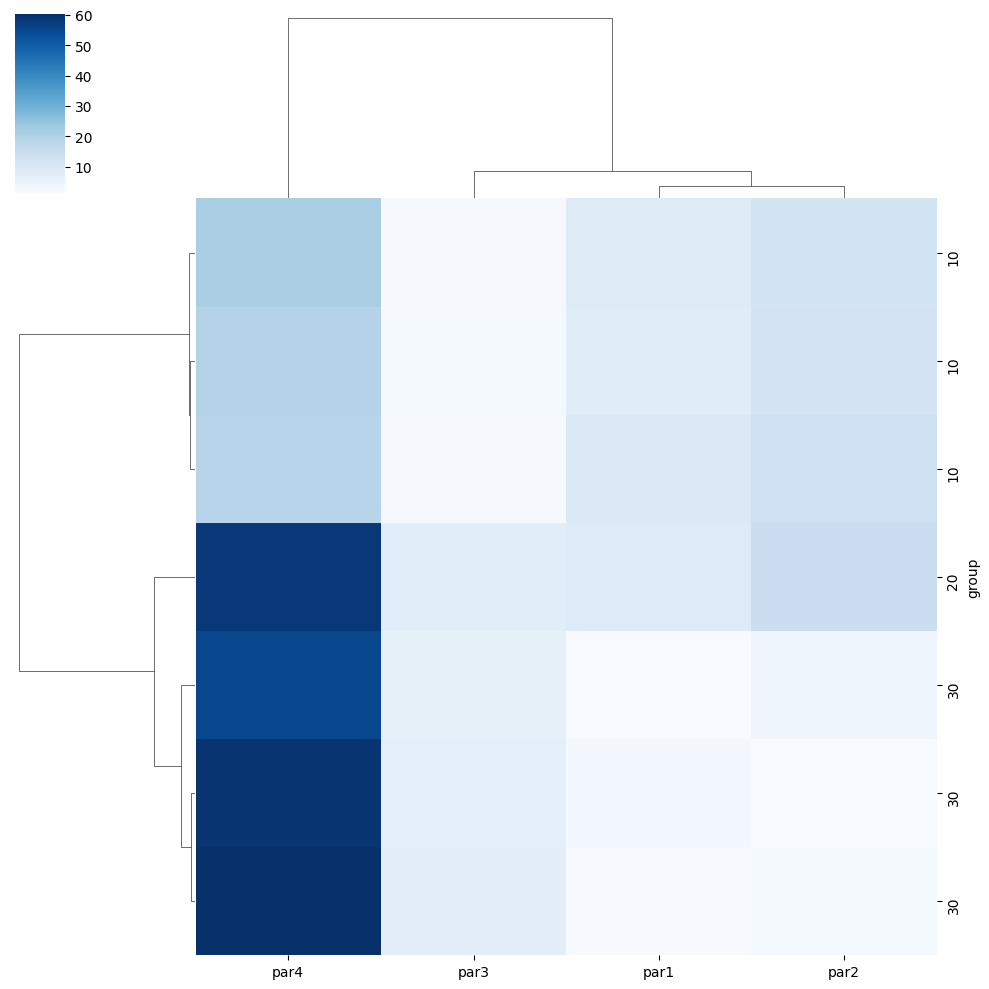

In [14]:
import pandas as pd
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from seaborn import clustermap
from matplotlib import pyplot as plt

# wczytanie i podgląd danych
df = pd.read_csv("/content/pacjent.txt", delim_whitespace=True, header=0)
print(df.head())

#analiza skupień
df = df.set_index('group') # ustawienie etykiet obiektów
Z = linkage(df.values, method='ward', metric='euclidean')
# oblicza macierz odległości i ustala hierarchiczną
# relację pomiędzy obiektami
d = dendrogram(Z, labels=df.index, color_threshold=50)
# rysuje dendrogram (oś x - opis obiektów, oś y - odległość)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

# dwuwymiarowa analiza skupień i mapa cieplna
clustermap(df, metric="euclidean", method="ward", cmap="Blues")
plt.show()
#gripu to indeks obiektu


In [15]:
import pandas as pd
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from seaborn import clustermap
from matplotlib import pyplot as plt
# wczytanie i podgląd danych
df = pd.read_csv("/content/pacjent.txt", delim_whitespace=True, header=0)
print(df.head())
#analiza skupień

   par1  par2  par3  par4  group
0   7.9  12.1   2.1  19.1     10
1   9.4  13.4   1.9  18.8     10
2   8.5  11.8   1.7  21.1     10
3   1.2   3.7   6.3  55.2     30
4   8.8  14.3   7.7  58.4     20


Dendrogram w ten sposób, aby **oś obiektów** była po **lewej stronie** (przydatne, gdy wiele obiektów)

In [16]:
#wyświetlić dendrogram w ten sposób, aby oś obiektów była po lewej stronie (przydatne, gdy wiele obiektów)
df = df.set_index('group') # ustawienie etykiet obiektów
print(df.head())

       par1  par2  par3  par4
group                        
10      7.9  12.1   2.1  19.1
10      9.4  13.4   1.9  18.8
10      8.5  11.8   1.7  21.1
30      1.2   3.7   6.3  55.2
20      8.8  14.3   7.7  58.4


Modyfikacja parametrów funkcji **linkage (metoda, metryka)** i
obserwacja zmiany kształtu dendrogramu (istotne – podstawowe
kryterium optymalizacji)
- modyfikacja parametrów funkcji dendrogramu **(color_threshold)** i
obserwować zmiany

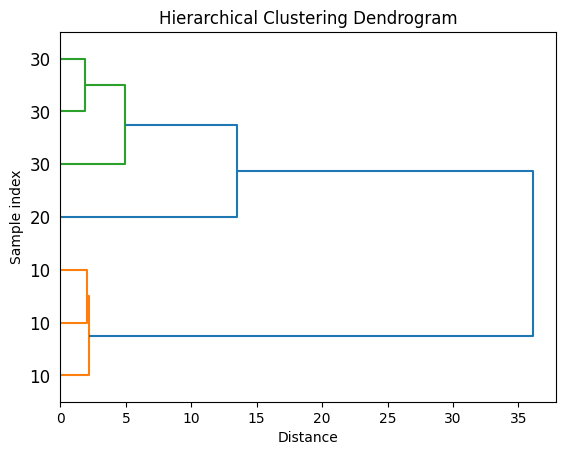

In [17]:
Z = linkage(df.values, method='single', metric='euclidean') #utwórz dendogram, po obliczeniu macierzy odległości
# oblicza macierz odległości i ustala hierarchiczną
# relację pomiędzy obiektami
d = dendrogram(Z, labels=df.index, color_threshold=10, orientation = 'right') #10 tu odcięcie i poniżej te wartości są oznaczone innymi kolorami obiekty
# rysuje dendrogram (oś x - opis obiektów, oś y - odległość)
plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel('Sample index')
plt.xlabel('Distance')
plt.show()

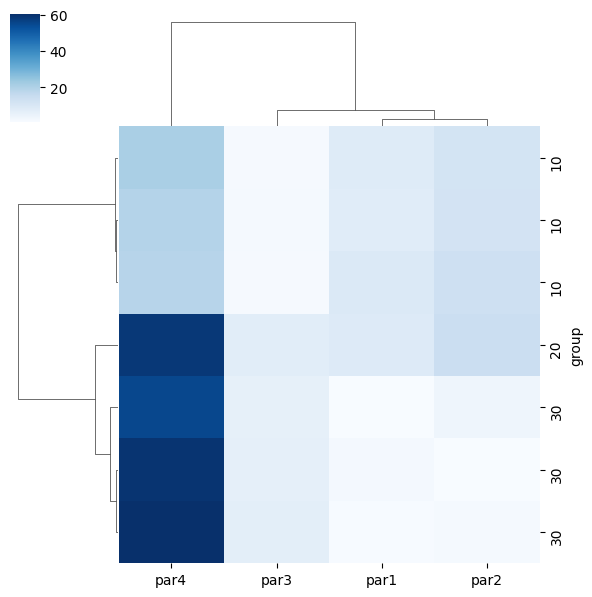

In [18]:
# dwuwymiarowa analiza skupień i mapa cieplna
sns.clustermap(df, metric="euclidean", method="ward", cmap="Blues", figsize=(6, 6))
plt.show()
#gripu to indeks obiektu

Przykład 3. Analiza skupień

In [20]:
import seaborn as sns
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
df = pd.read_csv("/content/dent.txt", delim_whitespace=True, header=0) #26 obiektów 14 wierszy
print(df.head())
df = df.set_index('Producent')
del df['Grupa'] # usuwanie kolumny – dlaczego?
#indeks to tylko jedna kolumna, a grupa i producent to jest to samo


   Cr   Zn  Cd  Pb  Co  Ni   Mn  Cu   Sr   Ba    Mg    Ti Producent  Grupa
0  33  302   4   3   7  19  306  17  744  205  7328   983         A      1
1  27  291   4   3   9  18  307  15  762  181  8000  1035         A      1
2  35  306   4   3   7  20  316  16  714  167  7186   958         A      1
3  22  255   4  10   7  19  317  19  733  169  7416   969         A      1
4  27  275   4   3   7  20  301  21  743  194  8310   990         A      1


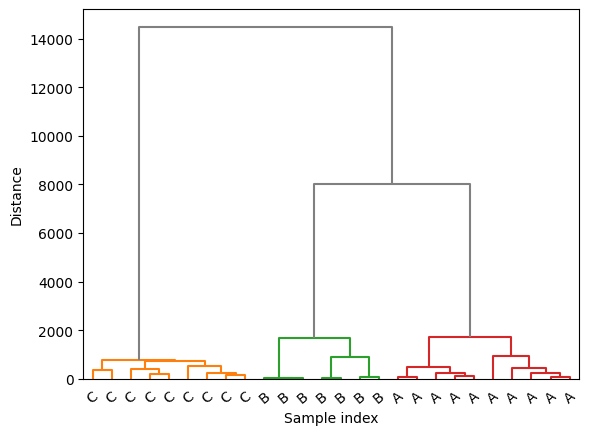

In [21]:
Z = linkage(df.values, method='ward', metric='euclidean')
d = dendrogram(Z, labels=df.index, leaf_rotation=40,
color_threshold=4000, above_threshold_color='grey') #leaf_rotation=40,color_threshold=4000
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

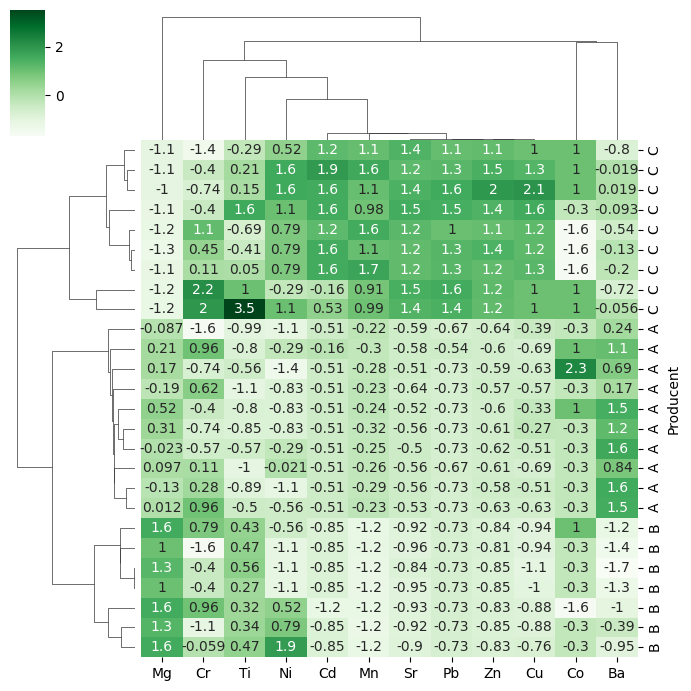

In [22]:
sns.clustermap(df, metric="correlation", method="single",
cmap="Greens",figsize=(7, 7), z_score= 1, annot = True) #z_score= 1
plt.show()

## PCA

Podstawowe cele PCA: 

- redukcja wymiarowości przestrzeni, tzn. przekształcanie k skorelowanych
zmiennych pierwotnych w k głównych składowych (PC – principal component), przy
czym znaczna część istotnej zmienności jest opisana przez kilka początkowych
nowych zmiennych
- prezentacja graficzna danych w przestrzeni o zredukowanej wymiarowości
- eksploracja zbioru danych, detekcja podzbiorów obiektów podobnych, detekcja
punktów odbiegających. 


In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
iris = sns.load_dataset("iris")
print('Dane wejściowe: \n', iris.head())
#zmienne objaśniające to liczby, species nie jest zmienną objaśniającą

Dane wejściowe: 
    sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa



Zmienne objaśniające: 
    sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2

Opisywana zmienność:  [0.73 0.23 0.04 0.01]


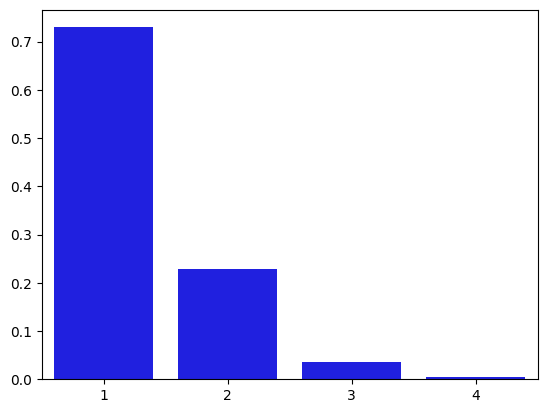

In [25]:
X = iris.drop('species', axis=1) # Usunięcie kolumny 'species' - nie jest zmienną objaśniającą

y = iris['species']

print('\nZmienne objaśniające: \n', X.head())
sc = StandardScaler()
sc.fit(X)
X = sc.transform(X) # Autoskalowanie
# PCA i transformacja X do głównych składowych (PC)

pca = PCA()
PC = pca.fit_transform(X)


# Analiza zmienności opisywanej przez poszczególne PC
print('\nOpisywana zmienność: ', pca.explained_variance_ratio_)
sns.barplot(x=np.arange(1,5), y=pca.explained_variance_ratio_, # np. arange - dopasowac (1,4) do ilosci zmiennych kolumn
color='blue')
plt.show()




Wyniki - rzut obiektów na płaszczyznę głównej składowej 1 oraz 2


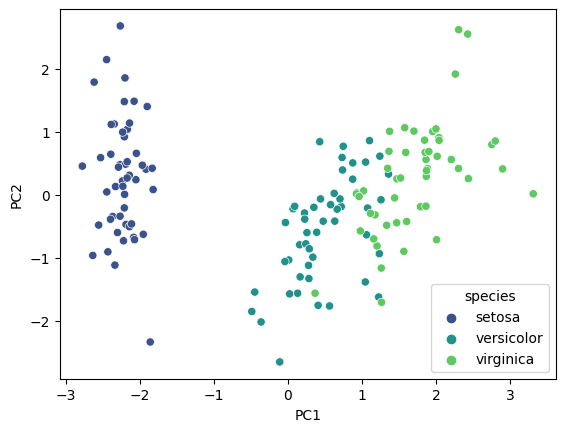

In [26]:
# Rzut obiektów na płaszczyznę PC1/PC2
print('\nWyniki - rzut obiektów na płaszczyznę głównej składowej 1 oraz 2')
sns.scatterplot(x=PC[:,0], y=PC[:,1], sizes=50, palette='viridis',
hue=y)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


Wyniki - rzut obiektów na płaszczyznę głównej składowej 2 oraz 3


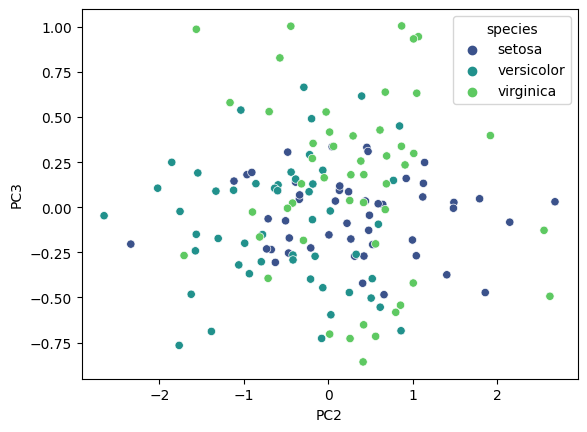

In [27]:
print('\nWyniki - rzut obiektów na płaszczyznę głównej składowej 2 oraz 3')
sns.scatterplot(x=PC[:,1], y=PC[:,2], sizes=50, palette='viridis',
hue=y)
plt.xlabel('PC2')
plt.ylabel('PC3')
plt.show()


Wyniki - rzut obiektów na płaszczyznę głównej składowej 1 oraz 3


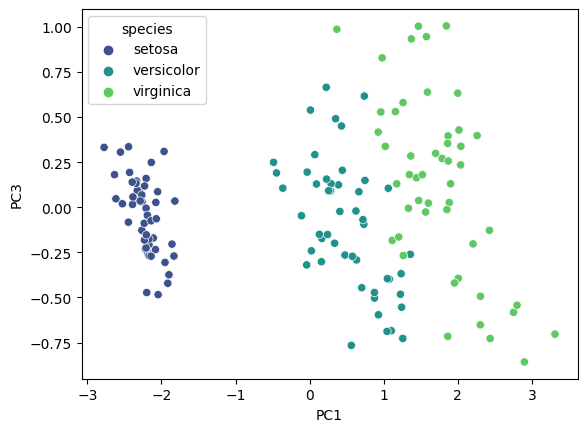

In [28]:
print('\nWyniki - rzut obiektów na płaszczyznę głównej składowej 1 oraz 3')
sns.scatterplot(x=PC[:,0], y=PC[:,2], sizes=50, palette='viridis',
hue=y)
plt.xlabel('PC1')
plt.ylabel('PC3')
plt.show()

**Przykład 2**
Eksploracja zbioru opisującego grupę siedmiu pacjentów (dane o charakterze
dydaktycznym)
Zbadano siedmiu pacjentów, rejestrując dla nich parametry: par1, par2, par3, par4. 

In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
dataset = pd.read_csv("pacjent.txt", delim_whitespace=True, header=0)
print(dataset.head())
X = dataset.values[:,0:4] # Zmienne objaśniające - par1, par2,par3,par4
y = dataset['group']


   par1  par2  par3  par4  group
0   7.9  12.1   2.1  19.1     10
1   9.4  13.4   1.9  18.8     10
2   8.5  11.8   1.7  21.1     10
3   1.2   3.7   6.3  55.2     30
4   8.8  14.3   7.7  58.4     20


In [30]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X) # Autoskalowanie

In [31]:
pca = PCA(n_components=4)
modelPC = pca.fit(X)

In [32]:
# Procent opisywanej zmienności w formie num. i wykresu słupkowego
print('\nExplained variance / %: ')
for i in range(4):
  print('% 4.2f' % (100*pca.explained_variance_ratio_)[i])


Explained variance / %: 
 81.67
 17.62
 0.65
 0.06


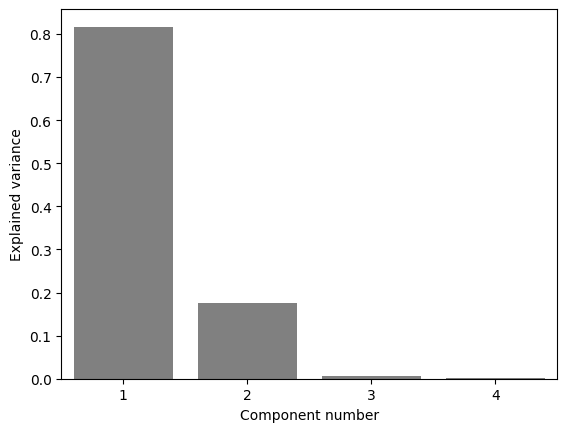

In [33]:
splot = sns.barplot(x=np.arange(1,5), y=pca.explained_variance_ratio_,
color='grey')
plt.xlabel('Component number')
plt.ylabel('Explained variance')
plt.show()

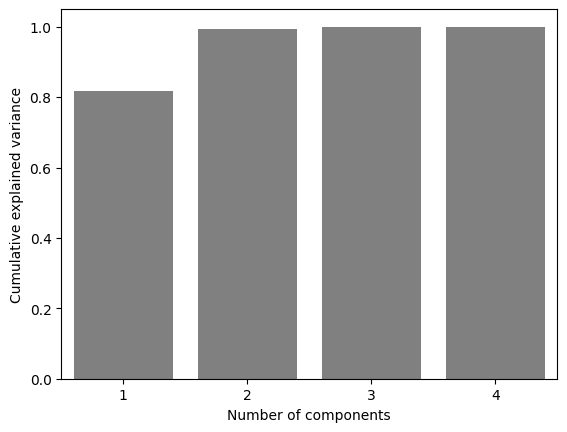

In [34]:
'''
Jaki procent zmienności opisują poszczególne główne składowe? Jaka jest liczba istotnych
głównych składowych? Jakie kryterium zastosowano do dokonania wyboru? 
'''

# Skumulowana zmienność
sns.barplot(x=np.arange(1,5), y=np.cumsum(pca.explained_variance_ratio_),
color='grey')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()


Component loadings :
 PC1 PC2
par1  0.51  0.45
par2  0.49  0.55
par3 -0.49  0.57
par4 -0.52  0.42


<Axes: >

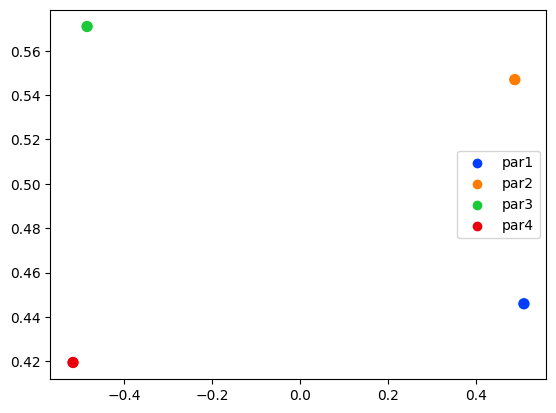

In [35]:
# Wagi składowych
print('\nComponent loadings :')
# Uwaga! Wagi dla poszczególnych składowych w wierszach
print(' PC1 PC2')
for i in range(4):
 print(dataset.columns[i], '% 4.2f' % (modelPC.components_)[0,i], '% 4.2f' %
       (modelPC.components_)[1,i])
sns.scatterplot(x=modelPC.components_[0,:], y=modelPC.components_[1,:],
hue=dataset.columns[0:4], palette='bright',s=80)

In [36]:
# PC1: part1*0.51 + part2*0.49 + part3*(-0.49) + part4*(-52)
#PC2 : part1*0.45 + part2*0.55 + part3(0.57) + part4*0.42

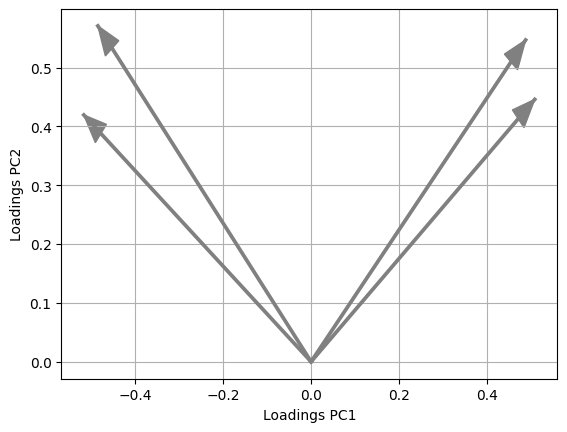

In [37]:
for i in range(0,4): # Wektory wskazujące wagi składowych
 ax=sns.lineplot(x=[0,modelPC.components_[0,i]],
y=[0,modelPC.components_[1,i]], color='grey', linewidth=2.7)
 ax.arrow(0,0, modelPC.components_[0,i], modelPC.components_[1,i], lw=1,
color='grey', head_length=.05, head_width=.04, length_includes_head=True)
plt.xlabel('Loadings PC1')
plt.ylabel('Loadings PC2')
plt.grid()
plt.show()


Component loadings :
 PC1 PC2
par1  0.51  0.45
par2  0.49  0.55
par3 -0.49  0.57
par4 -0.52  0.42


<Axes: >

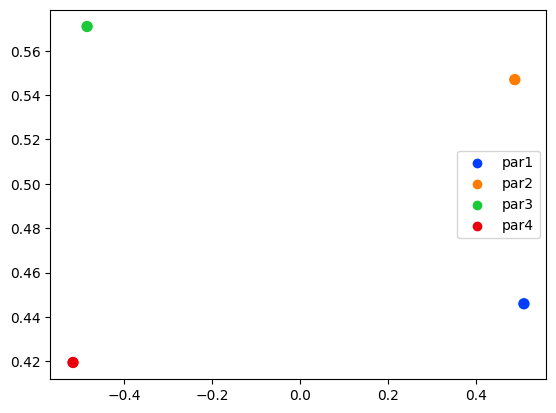

In [38]:
# Wagi składowych
print('\nComponent loadings :')
# Uwaga! Wagi dla poszczególnych składowych w wierszach
print(' PC1 PC2')
for i in range(4):
 print(dataset.columns[i], '% 4.2f' % (modelPC.components_)[0,i], '% 4.2f' %
       (modelPC.components_)[1,i])
sns.scatterplot(x=modelPC.components_[0,:], y=modelPC.components_[1,:],
hue=dataset.columns[0:4], palette='bright',s=80)


 Results :


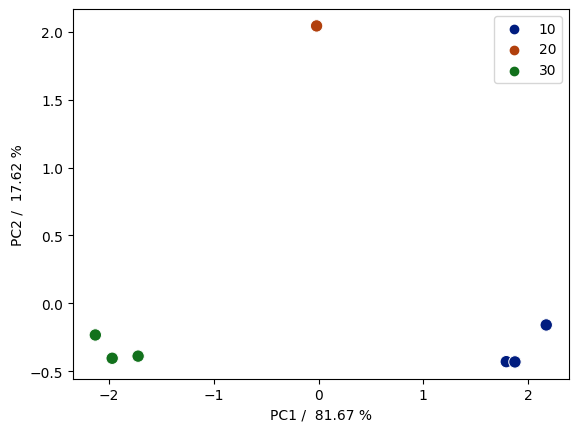

In [39]:
# Rzut obiektów na płaszczyznę PC1/PC2
print('\n Results :')
PC = modelPC.transform(X)
sns.scatterplot(x=PC[:,0], y=PC[:,1], palette='dark', hue=y,
legend='full', s=80)
plt.xlabel('PC1 / '+'% 4.2f' %
(100*pca.explained_variance_ratio_)[0] + ' %')
plt.ylabel('PC2 / '+'% 4.2f' %
(100*pca.explained_variance_ratio_)[1] + ' %')
plt.legend()
plt.show()


 Results :


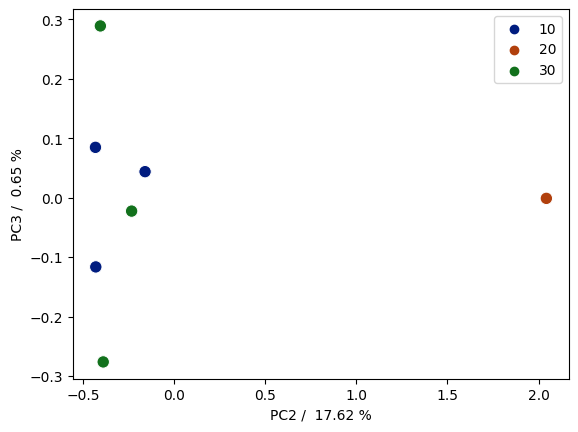

In [40]:
# Rzut obiektów na płaszczyznę PC1/PC2
print('\n Results :')
PC = modelPC.transform(X)
sns.scatterplot(x=PC[:,1], y=PC[:,2], palette='dark', hue=y,
legend='full', s=80)
plt.xlabel('PC2 / '+'% 4.2f' %
(100*pca.explained_variance_ratio_)[1] + ' %')
plt.ylabel('PC3 / '+'% 4.2f' %
(100*pca.explained_variance_ratio_)[2] + ' %')
plt.legend()
plt.show()


 Results :


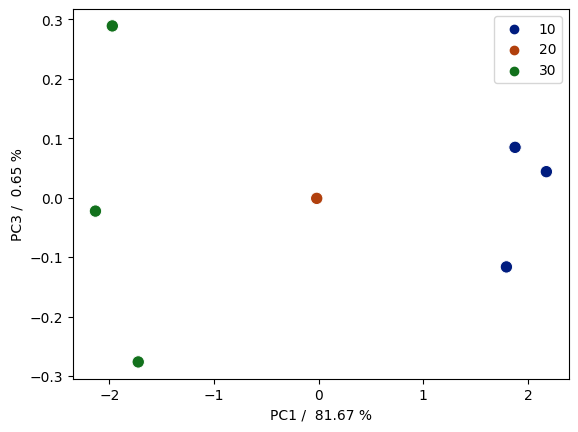

In [41]:
# Rzut obiektów na płaszczyznę PC1/PC2
print('\n Results :')
PC = modelPC.transform(X)
sns.scatterplot(x=PC[:,0], y=PC[:,2], palette='dark', hue=y,
legend='full', s=80)
plt.xlabel('PC1 / '+'% 4.2f' %
(100*pca.explained_variance_ratio_)[0] + ' %')
plt.ylabel('PC3 / '+'% 4.2f' %
(100*pca.explained_variance_ratio_)[2] + ' %')
plt.legend()
plt.show()


Przykład 3

Analiza zmian nowotworowych – rak piersi (opis zbioru danych dostępny z poziomu
skryptu)


Co nowego w tym przykładzie:

- zbiór danych typu bunch
- duża liczba zmiennych objaśniających (30), czyli PCA wykonamy podając jako
parametr (n_components) wartość mniejszą od 30, gdyż tyle głównych składowych
- analiza wag składowych za pomocą mapy cieplnej 

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# Dane do obliczeń
cancer = load_breast_cancer()
# Tworzenie ramki danych
df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
# Podgląd danych
print(df.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0           

(569, 30)
(569, 2)

Opisywana zmienność:  [0.44 0.19]


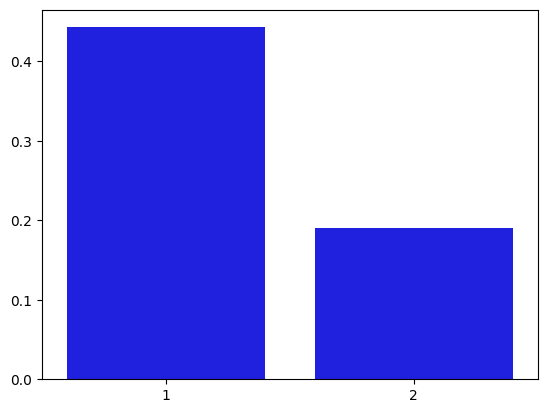

In [44]:
# Autoskalowanie
scaler = StandardScaler()
scaler.fit(df)
scaled_data = scaler.transform(df)
# PCA
pca = PCA(n_components=2)
x_pca = pca.fit_transform(scaled_data)
print(scaled_data.shape)
print(x_pca.shape)
# Analiza zmienności opisywanej przez poszczególne PC
print('\nOpisywana zmienność: ', pca.explained_variance_ratio_)
sns.barplot(x=np.arange(1,3), y=pca.explained_variance_ratio_,
color='blue')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/relational.py:573: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



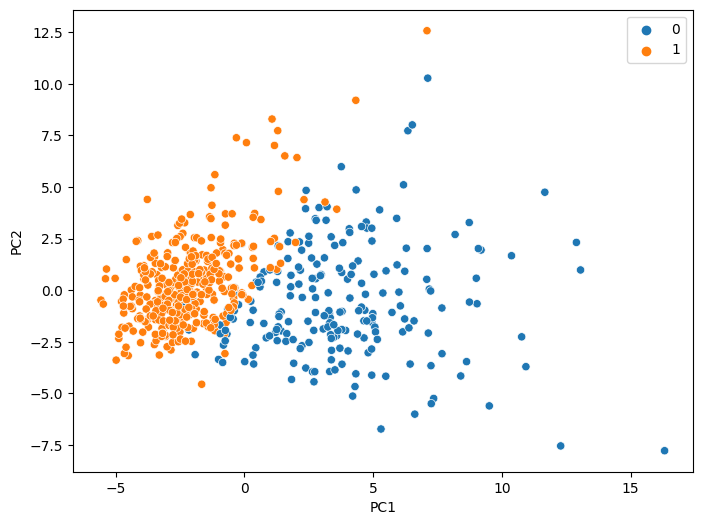

Loadings: 
[[ 0.22  0.1   0.23  0.22  0.14  0.24  0.26  0.26  0.14  0.06  0.21  0.02
   0.21  0.2   0.01  0.17  0.15  0.18  0.04  0.1   0.23  0.1   0.24  0.22
   0.13  0.21  0.23  0.25  0.12  0.13]
 [-0.23 -0.06 -0.22 -0.23  0.19  0.15  0.06 -0.03  0.19  0.37 -0.11  0.09
  -0.09 -0.15  0.2   0.23  0.2   0.13  0.18  0.28 -0.22 -0.05 -0.2  -0.22
   0.17  0.14  0.1  -0.01  0.14  0.28]]


Text(145.72222222222223, 0.5, 'Principal Components')

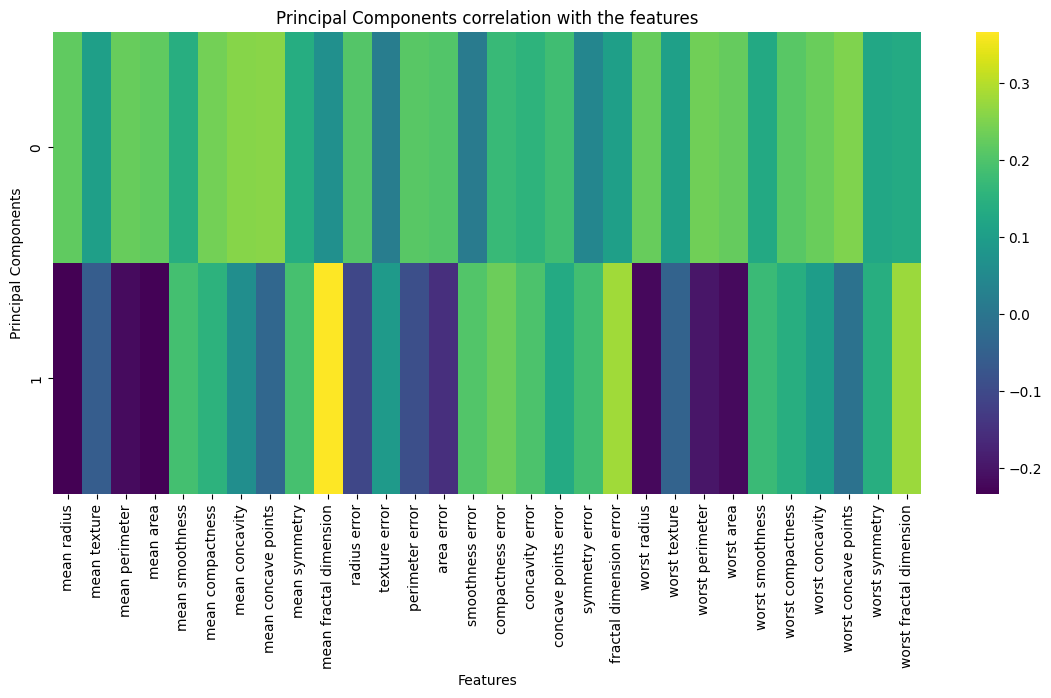

In [45]:
# Wyniki - rzut na PC1/PC2
plt.figure(figsize =(8, 6))
sns.scatterplot(x=x_pca[:,0], y=x_pca[:,1],hue=cancer['target'], cmap
='plasma')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()
# Wagi składowych (loadings == components_)
print('Loadings: ')
print(pca.components_[0:2,:])
df_pc = pd.DataFrame(pca.components_, columns = cancer['feature_names'])
df_pc
plt.figure(figsize=(14, 6))
sns.heatmap(df_pc, cmap='viridis')
plt.title('Principal Components correlation with the features')
plt.xlabel('Features')
plt.ylabel('Principal Components')

In [46]:
# zmieniamy zadanie 3 i obcinamy dane po 10 danych

# Dane do obliczeń
cancer = load_breast_cancer()
# Tworzenie ramki danych
df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
df = df.iloc[:,0:10]
# Podgląd danych
print(df.head())
scaler = StandardScaler()
scaler.fit(df)
scaled_data = scaler.transform(df)

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  
0                 0.07871  
1                 0.05667  
2       

(569, 10)
(569, 2)

Opisywana zmienność:  [0.55 0.25]


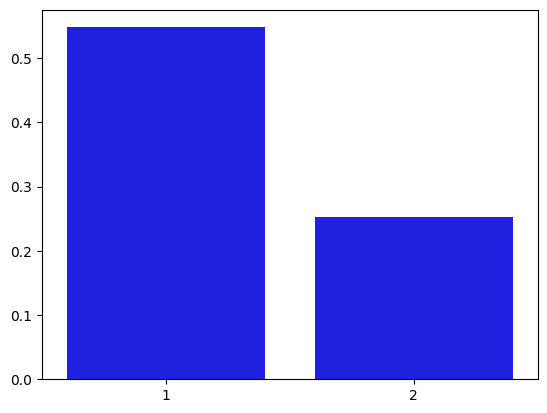

In [47]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(scaled_data)
print(scaled_data.shape)
print(x_pca.shape)
# Analiza zmienności opisywanej przez poszczególne PC
print('\nOpisywana zmienność: ', pca.explained_variance_ratio_)
sns.barplot(x=np.arange(1,3), y=pca.explained_variance_ratio_,
color='blue')
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/relational.py:573: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



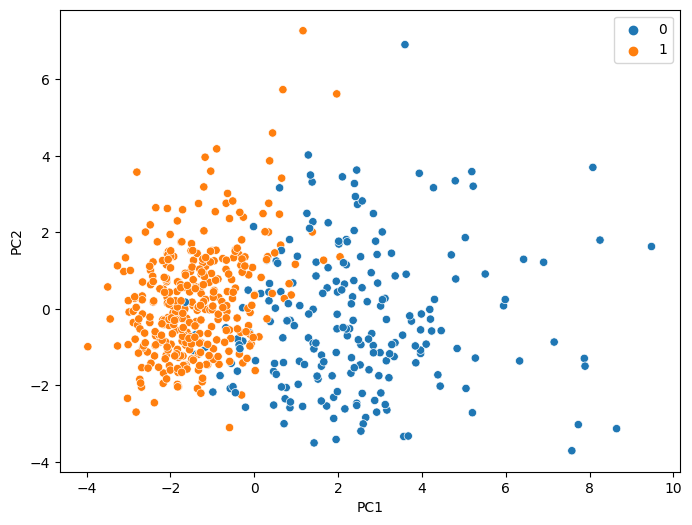

In [48]:
# Wyniki - rzut na PC1/PC2
plt.figure(figsize =(8, 6))
sns.scatterplot(x=x_pca[:,0], y=x_pca[:,1],hue=cancer['target'], cmap
='plasma')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

Loadings: 
[[ 0.36  0.15  0.38  0.36  0.23  0.36  0.4   0.42  0.22  0.07]
 [-0.31 -0.15 -0.28 -0.3   0.4   0.27  0.1   0.01  0.37  0.57]]


Text(145.72222222222223, 0.5, 'Principal Components')

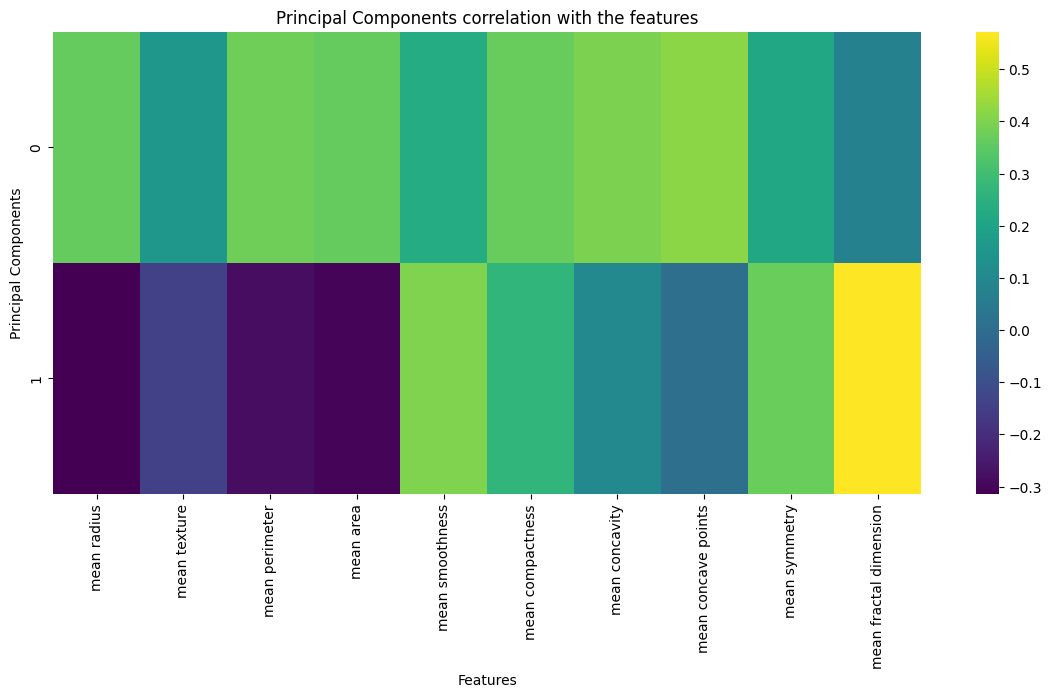

In [49]:
# Wagi składowych (loadings == components_)
print('Loadings: ')
print(pca.components_[0:2,:])



cancer_fet = cancer["feature_names"]

df_pc = pd.DataFrame(pca.components_, columns = cancer_fet[0:10])
df_pc
plt.figure(figsize=(14, 6))
sns.heatmap(df_pc, cmap='viridis')
plt.title('Principal Components correlation with the features')
plt.xlabel('Features')
plt.ylabel('Principal Components')

In [50]:
irir = sns.load_dataset("iris")
X = iris.drop('species',1)
y = iris['species']

<ipython-input-50-ca596c959988>:2: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.



In [51]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

print(cancer.target)
df = pd.DataFrame(data=cancer.data, columns = cancer.feature_names)
pd.set_option('display.max_columns',999)
print(df.head())

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [52]:
df.shape
# 30 zmiennych i 569 obiektów0
# y - 0 lub 1 zmienne grupujące
#0 - brak, 1 - zmiana złośliwa
#

(569, 30)

In [53]:
#wykonujjemy autoskalowanie
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scalar.fit(df)
scaled_data = scalar.transform(df)

In [54]:
# PCA 
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)

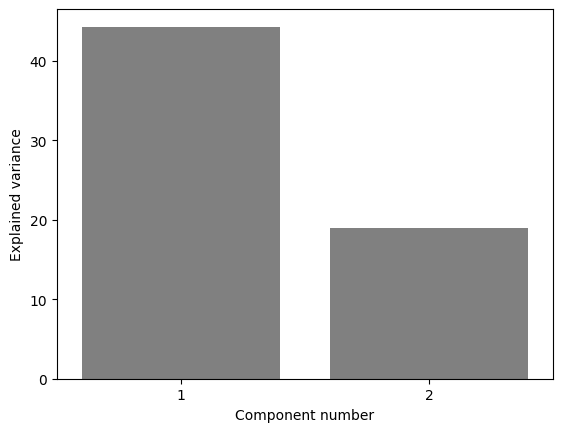

In [55]:
sns.barplot(x = np.arange(1,3), y = 100*pca.explained_variance_ratio_,color = 'grey')
plt.xlabel("Component number")
plt.ylabel("Explained variance")
plt.show()

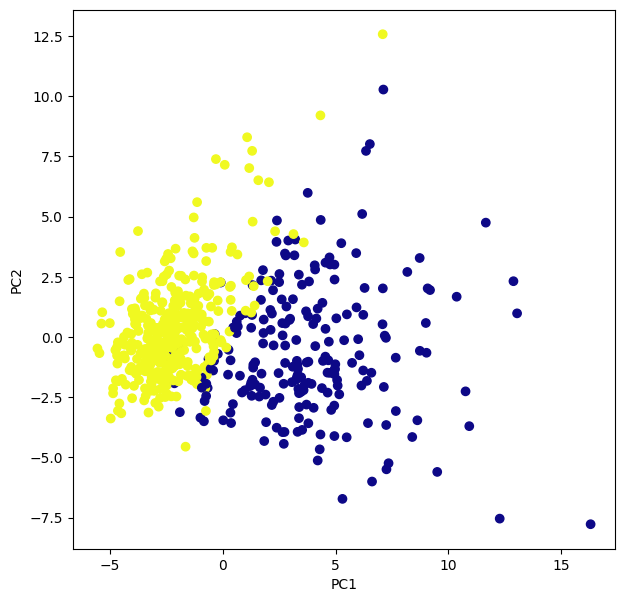

In [56]:
plt.figure(figsize = (7,7))
plt.scatter(x_pca[:,0], x_pca[:,1], c= cancer['target'], cmap = 'plasma')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

Loadings: 
[[ 0.22  0.1   0.23  0.22  0.14  0.24  0.26  0.26  0.14  0.06  0.21  0.02
   0.21  0.2   0.01  0.17  0.15  0.18  0.04  0.1   0.23  0.1   0.24  0.22
   0.13  0.21  0.23  0.25  0.12  0.13]
 [-0.23 -0.06 -0.22 -0.23  0.19  0.15  0.06 -0.03  0.19  0.37 -0.11  0.09
  -0.09 -0.15  0.2   0.23  0.2   0.13  0.18  0.28 -0.22 -0.05 -0.2  -0.22
   0.17  0.14  0.1  -0.01  0.14  0.28]]


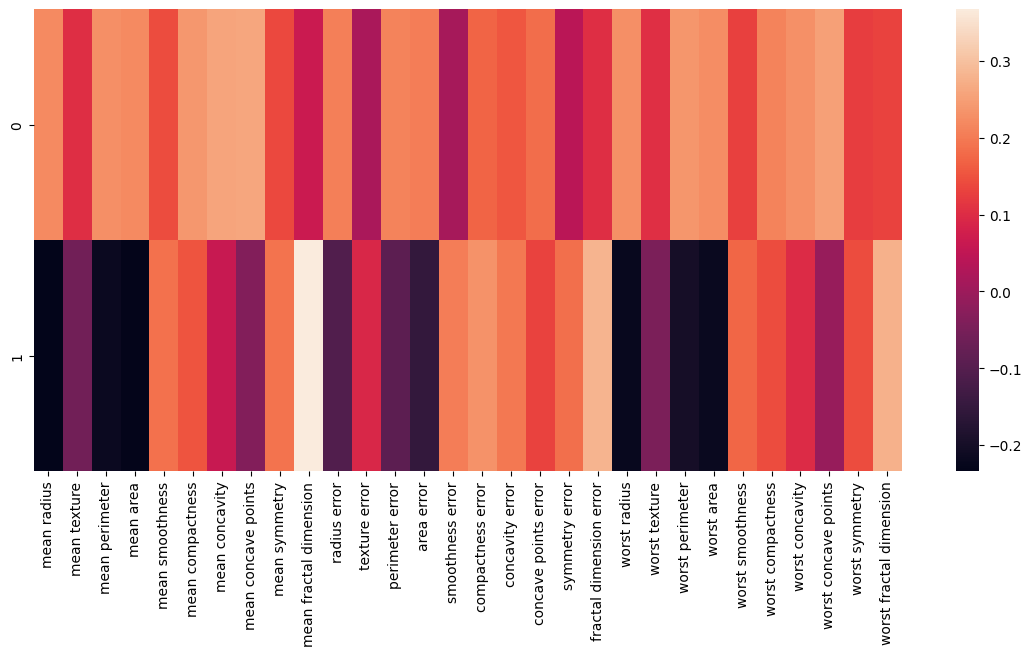

In [57]:
#wagi składowych
print("Loadings: ")
print(pca.components_[0:2,:])
df_comp = pd.DataFrame(pca.components_, columns = cancer['feature_names'])

#mapa cieplna

plt.figure(figsize =(14,6))
sns.heatmap(df_comp)
plt.show()

# dwa wektory o dł 30:
#zmienne objasniające
#liczba wybranych przez nas głownych składowych
# pc1 = 0.21 * mean(radius)  
# 0 , 10 * mean(texture)
# 0.23 * mean(...)


# pc2 = - 0.23 * mean(radious)
# - 0.059* mean()


# te które są na ciemno & na biało - mają największy wpływ ( min. na pc2)



# taka chmura punktów zrutowana na pc1 będą się pokrywać
# dlateo żadna ze zmiennych nie powoduja odróznienia
# napewno potrzebujemy dwie główne składowe




PCA (Principal Component Analysis) to technika wykorzystywana w uczeniu maszynowym i analizie danych do redukcji wymiarowości zbioru danych, zachowując jednocześnie jak najwięcej zmienności w danych.

PCA polega na transformacji zbioru danych poprzez zidentyfikowanie składowych głównych (principal components), które są liniowymi kombinacjami pierwotnych cech, które wyjaśniają maksymalną ilość zmienności w danych. Pierwsza składowa główna wyjaśnia najwięcej zmienności w danych, a każda kolejna składowa wyjaśnia jak najwięcej zmienności, będąc ortogonalnymi (niezależnymi) względem poprzednich składowych.

In [60]:
from sklearn.model_selection import train_test_split
df = pd.read_csv('wine.csv')
print(df.info())

# mowi nam ile pustych obiektów jest
# jakiego typu dane mamy

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine                  178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic.acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Acl                   178 non-null    float64
 5   Mg                    178 non-null    int64  
 6   Phenols               178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid.phenols  178 non-null    float64
 9   Proanth               178 non-null    float64
 10  Color.int             178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD                    178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB
None


In [61]:
X = df.values[:,1:]
y = df.values[:,0]
# 178 - 1 wymiary
df.describe()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [62]:
X_train, y_train, X_test, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)

# okolo 20-30 % dajemy do zbioru testowego
# random_state = 0 - powoduje że sposób wylosowania obiektów będzie taki sam

# test_size = 0.3 - w zbiorze treningowym mamy 124 obiekty a w testowym 54



Zbiór danych - pingwiny

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [66]:
#Wczytujemy dane
df = pd.read_csv("penguins.csv")
df.shape
df.head() #wyświrtlam pierwsze pięć



,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [67]:
# Usunięcie wierszy z brakującymi danymi
df = df.dropna()
# Wybór zmiennych objaśniających
X = df[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]

In [68]:
# Autoskalowanie
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

# PCA i transformacja X do głównych składowych (PC)
pca = PCA()
PC = pca.fit_transform(X)



Opisywana zmienność:  [0.69 0.19 0.09 0.03]


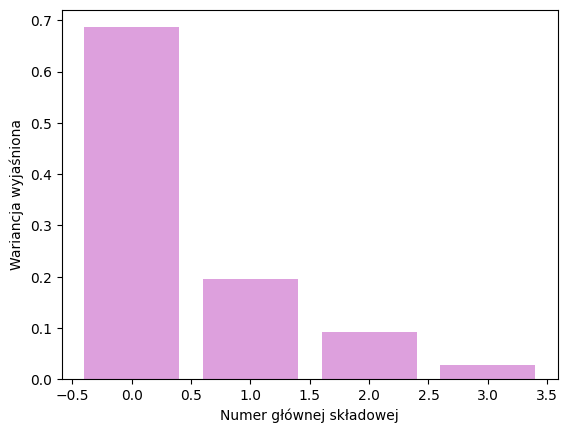

In [69]:
# Wariancja opisywana przez poszczególne główne składowe
plt.bar(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_, color = 'plum')
print('\nOpisywana zmienność: ', pca.explained_variance_ratio_) 
plt.xlabel('Numer głównej składowej') #opisanie osi X i Y
plt.ylabel('Wariancja wyjaśniona')
plt.show() # wyświetlenie wykresu

/usr/local/lib/python3.10/dist-packages/seaborn/relational.py:573: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



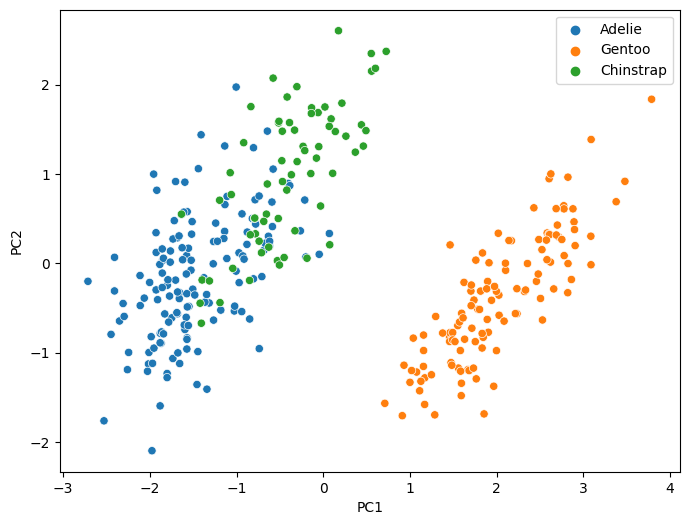

In [70]:
# Rzutowanie obiektów na pierwsze dwie główne składowe
x_pca = PC[:, :2]
# Rzut obiektów PC1/PC2
plt.figure(figsize=(8, 6)) 
sns.scatterplot(x=x_pca[:,0], y=x_pca[:,1],hue=df['species'], cmap='plasma')
plt.xlabel('PC1') #opisanie osi
plt.ylabel('PC2')
plt.legend() #legenda
plt.show() #wyświetlenie wykresu

In [71]:
# Ile głównych składowych uznano za istotne?
print('Liczba istotnych głównych składowych:', np.sum(pca.explained_variance_ratio_ > 0.1))

Liczba istotnych głównych składowych: 2


## uczenie maszynowe z nadzorem 


Metoda klasyfikacji binarnej

LDA - liniowa analza dyskryminacyjna (obiektów powinno byc 3 razy więcej niz zmiennych)

LR - Regresja logistyczna

kNN

Precyzja (precision) dla klasy A to stosunek poprawnie rozpoznanych

elementów z A do wszystkich, które klasyfikator oznaczył jako A.
Czułość (recall) dla klasy A to stosunek poprawnie rozpoznanych

elementów z A do wszystkich, które powinien rozpoznać jako A, czyli
do całej klasy A.

F1
F1 łączy ocenę precyzji i czułości. Najkorzystniejsza wartość F1
wynosi 1, a najmniej oczekiwana – 0. W przypadku wielu klas jest to

średnia z wartości obliczonej dla każdej klasy.
F1 = 2 * (precision * recall) / (precision + recall) 


In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, cross_val_score
# Dane do obliczeń - zbiór rK PIERSI Z BIBLIOTEKI JAKIEJS 
# ładujemy zbiór X i Y osobno bo jestto metoda z nadzorem
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target  # target to y etykiety

Przykład 1. Klasyfikator binarny - walidacja prosta z podziałem na
zbiór treningowy i walidacyjny oraz walidacja krzyżowa
Istotne

1.Podział macierzy X i y na zbiór treningowy i walidacyjny.
Najlepiej zastosować funkcję train_test_split. Jej parametr
test_size pozwala ustalić, jaki będzie udział zbioru testowego.
Przeważnie przyjmujemy 0.2-0.33.

2.Walidacja prosta polega na zdefiniowaniu modelu dla zbioru
treningowego i sprawdzeniu czy poprawna jest predykcja obiektów ze
zbioru testowego. Badanie wykonujemy stosując współczynniki oceny
jakości modelu i macierz pomyłek.

3.Bardzo zalecane jest wykonanie także predykcji przynależności do
klas dla zbioru treningowego. Jeżeli dokładność w obu przypadkach
będzie zgodna, to możemy stwierdzić, że model nie jest przeuczony
(overfitted). Dokładność dla danych treningowych nie powinna być
wyższa niż dla zbioru testowego! To ważne! Przeuczone modele w
zasadzie nie mają zastosowania w praktyce.


In [73]:
# Podział na zbiór treningowy i testowy (dotyczy X i y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)


#LDA - klasyfikator binarny
da = LinearDiscriminantAnalysis() # LDA
da.fit(X_train, y_train) # trenowanie klasyfikatora
y_test_pred = da.predict(X_test) # predykcja klas - zbiór testowy
# do jakiej klasy nalezą zbiory obiektu testowego? y_test podstawiam do y_test_pred

In [74]:
# Raport klasyfikacyjny - pytam się jak to predict zadziałało ?
print(classification_report(y_test, y_test_pred))
# 0 ,1 - to class
#f1-scre - średnia harmoniczna obu kolumn precision i recall
#support : ile w zbiorze testowym jest obiektó klasy zero i klasy jeden

# accurancy  
#macro i weifhted

              precision    recall  f1-score   support

           0       1.00      0.91      0.96        47
           1       0.94      1.00      0.97        67

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [75]:
# Walidacja krzyżowa z podziałem zbioru na 4 części
scores = cross_val_score(da, X, y, cv=4)
# Dokładność dla każdego podzbioru, średnia dokładność i std
print('Accuracy: ',scores)
print('Accuracy (mean): ', scores.mean())
print('Accuracy (std): ', scores.std()) 


Accuracy:  [0.95 0.95 0.96 0.97]
Accuracy (mean):  0.9595932236777307
Accuracy (std):  0.009066077175388355


In [76]:

y_train_pred = da.predict(X_train) # predykcja klas - zbiór testowy

print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.99      0.90      0.95       165
           1       0.95      1.00      0.97       290

    accuracy                           0.96       455
   macro avg       0.97      0.95      0.96       455
weighted avg       0.96      0.96      0.96       455



In [77]:
# overfiting - pojećie przeuczenia
# wynika z tg że np dane za mało zróżnicowane, za mały zbió danych, niezbalansowanie klas
#

In [78]:
# Walidacja krzyżowa z podziałem zbioru na 4 części
scores = cross_val_score(da, X, y, cv=5, scoring = 'f1' )
# Dokładność dla każdego podzbioru, średnia dokładność i std
print('f1: ',scores)
print('f1 (mean): ', scores.mean())
print('f1 (std): ', scores.std()) 

f1:  [0.97 0.97 0.96 0.97 0.97]
f1 (mean):  0.9686630352601066
f1 (std):  0.005132423311793016


Przykład 2. 
Klasyfikator wieloklasowy - walidacja prosta z podziałem
na zbiór treningowy i walidacyjny

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

In [80]:
df = pd.read_csv("wine.csv")
print(df.head())
print(df.describe()) # statystyka opisowa



   Wine  Alcohol  Malic.acid   Ash   Acl   Mg  Phenols  Flavanoids  \
0     1    14.23        1.71  2.43  15.6  127     2.80        3.06   
1     1    13.20        1.78  2.14  11.2  100     2.65        2.76   
2     1    13.16        2.36  2.67  18.6  101     2.80        3.24   
3     1    14.37        1.95  2.50  16.8  113     3.85        3.49   
4     1    13.24        2.59  2.87  21.0  118     2.80        2.69   

   Nonflavanoid.phenols  Proanth  Color.int   Hue    OD  Proline  
0                  0.28     2.29       5.64  1.04  3.92     1065  
1                  0.26     1.28       4.38  1.05  3.40     1050  
2                  0.30     2.81       5.68  1.03  3.17     1185  
3                  0.24     2.18       7.80  0.86  3.45     1480  
4                  0.39     1.82       4.32  1.04  2.93      735  
             Wine     Alcohol  Malic.acid         Ash         Acl          Mg  \
count  178.000000  178.000000  178.000000  178.000000  178.000000  178.000000   
mean     1.9382

In [81]:
X = df.values[:, 1:]
y = df.values[:, 0]
print(np.unique(y, )) #ile różnych etykiet i liczebność klas 


[1. 2. 3.]


In [82]:
X = df.values[:, 1:]
y = df.values[:, 0]
print(np.unique(y,return_counts= True)) #ile różnych etykiet i liczebność klas 
# dodaliśmy parametr kt wyświetli nam liczebność klasy

(array([1., 2., 3.]), array([59, 71, 48]))


In [83]:
# Podział na zbiór treningowy i testowy (dotyczy X i y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [84]:
da = LinearDiscriminantAnalysis() # LDA
da.fit(X_train, y_train) # trenowanie klasyfikatora
y_train_pred = da.predict(X_train) # predykcja klas-zbiór terningowy
y_test_pred = da.predict(X_test) # predykcja klas - zbiór testowy
print('Accuracy (train):', accuracy_score(y_train, y_train_pred))
print('Accuracy (test):', accuracy_score(y_test, y_test_pred))

Accuracy (train): 1.0
Accuracy (test): 0.9814814814814815


In [85]:
# Obliczanie współczynników oceny modelu - zbiór testowy
print('Precision:', precision_score(y_test, y_test_pred, average = 'macro')) # sposób uśrednienia klasyfikatora 
print('Recall:', recall_score(y_test, y_test_pred, average = None))
print('F1:', f1_score(y_test, y_test_pred, average = None )) 

Precision: 0.9833333333333334
Recall: [1.   0.95 1.  ]
F1: [0.97 0.98 1.  ]


In [86]:
labels = np.unique(y)
print(classification_report(y_test, y_test_pred, labels=labels))

              precision    recall  f1-score   support

         1.0       0.95      1.00      0.97        19
         2.0       1.00      0.95      0.98        22
         3.0       1.00      1.00      1.00        13

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



In [87]:
# macierz pomyłek dla zbioru testowego (tekst)
print('Confusion matrix (test)')
labels = np.unique(y)
cm = confusion_matrix(y_test, y_test_pred) # wyświetl macierz pomyłek 
print(pd.DataFrame(cm, index=labels, columns=labels))

Confusion matrix (test)
     1.0  2.0  3.0
1.0   19    0    0
2.0    1   21    0
3.0    0    0   13


Confusion matrix – plot (test)


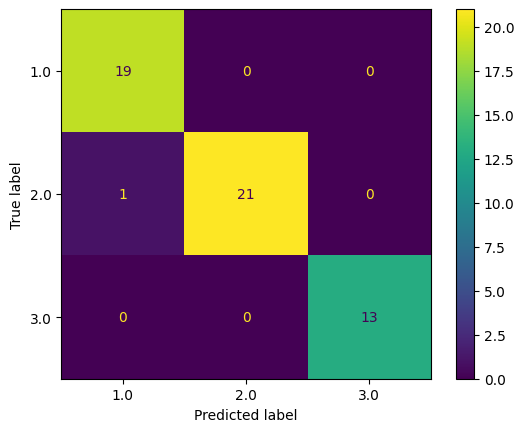

In [88]:
# macierz pomyłek dla zbioru testowego (grafika)

print('Confusion matrix – plot (test)')
disp = ConfusionMatrixDisplay(cm, display_labels=labels)
disp.plot()
plt.savefig('cm-wines-lda.png') # zapisanie rysunku
plt.show() 

In [89]:
print('Confusion matrix (train)')
labels = np.unique(y)
cm = confusion_matrix(y_train, y_train_pred) # wyświetl macierz pomyłek 
print(pd.DataFrame(cm, index=labels, columns=labels))




Confusion matrix (train)
     1.0  2.0  3.0
1.0   40    0    0
2.0    0   49    0
3.0    0    0   35


Confusion matrix – plot (train)


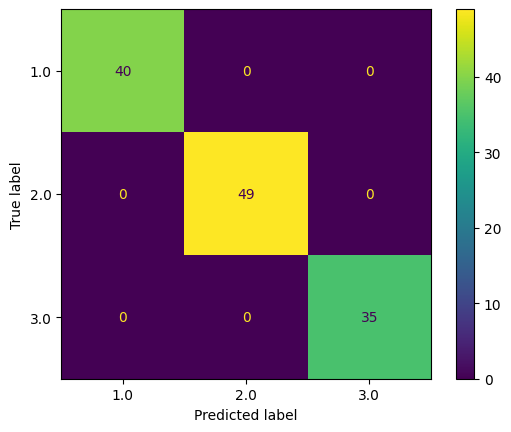

In [90]:
print('Confusion matrix – plot (train)')
disp = ConfusionMatrixDisplay(cm, display_labels=labels)
disp.plot()
plt.savefig('cm-wines-lda.png') # zapisanie rysunku
plt.show() 


In [91]:
#Sugestie dalszych działań

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
y_test_pred = qda.predict(X_test)

In [92]:

print('QDA Accuracy (test):', accuracy_score(y_test, y_test_pred))
from sklearn.neighbors import KNeighborsClassifier
kNN = KNeighborsClassifier(n_neighbors=5) # modyfikować n_neighbors


QDA Accuracy (test): 1.0


In [93]:

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(tol=0.001, max_iter=200) 



Analiza wyników


1.Model ma wysokie, zadowalające zdolności predykcyjne, gdyż
dokładność dla zbioru testowego wynosi ponad 0,98.Przeuczenie
modelu nie występuje, gdyż dokładność dla zbioru treningowego i
testowego są bardzo wysokie i praktycznie zgodne.
2.Z macierzy pomyłek wnioskujemy, że w zbiorze testowym tylko jeden
obiekt jest nieprawidłowo klasyfikowany.
Sugestie dalszych obliczeń
1.Zmieniać udział zbioru testowego (test_size) i obserwować efekty.
2.Przetestować na tym zbiorze danych działanie zupełnie innych
algorytmów klasyfikacyjnych (QDA, kNN, regresja logistyczna).
Porównać dokładność i inne miary oceny jakości modeli. 

Przykład 3

Istotne
1. Walidacja krzyżowa to najczęściej stosowania współcześnie metoda
walidacji zewnętrznej. Do jest wykonania na początek najlepiej
użyć funkcji cross_val_score. Funkcja trenuje kolejne modele i
umożliwia ich ocenę.
2. Jeżeli chcemy uzyskać ocenę jakości modeli za pomocą kilku
współczynników konieczne jest zastosowanie funkcji
cross_validate.
3. Poniżej podano 2 warianty wykonania walidacji krzyżowej. 


In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
df = pd.read_csv("wine.csv")
print(df.head())
X = df.values[:, 1:]
y = df.values[:, 0]
da = LinearDiscriminantAnalysis() # LDA

   Wine  Alcohol  Malic.acid   Ash   Acl   Mg  Phenols  Flavanoids  \
0     1    14.23        1.71  2.43  15.6  127     2.80        3.06   
1     1    13.20        1.78  2.14  11.2  100     2.65        2.76   
2     1    13.16        2.36  2.67  18.6  101     2.80        3.24   
3     1    14.37        1.95  2.50  16.8  113     3.85        3.49   
4     1    13.24        2.59  2.87  21.0  118     2.80        2.69   

   Nonflavanoid.phenols  Proanth  Color.int   Hue    OD  Proline  
0                  0.28     2.29       5.64  1.04  3.92     1065  
1                  0.26     1.28       4.38  1.05  3.40     1050  
2                  0.30     2.81       5.68  1.03  3.17     1185  
3                  0.24     2.18       7.80  0.86  3.45     1480  
4                  0.39     1.82       4.32  1.04  2.93      735  


In [95]:
print('Cross-validation - v1') # walidacja krzyżowa z podziałem zbioru na 5 części
scores = cross_val_score(da, X, y, cv=5)
# dokładność dla każdego podzbioru, średnia dokładność i std
print('Accuracy: ',scores)
print('Accuracy (mean): ', scores.mean())
print('Accuracy (std): ', scores.std())


Cross-validation - v1
Accuracy:  [1.   1.   0.94 0.94 0.97]
Accuracy (mean):  0.9717460317460318
Accuracy (std):  0.025205629512735514


In [96]:
print('Cross-validation – v3')
from sklearn.model_selection import ShuffleSplit # więcej informacji, jak prowadzić walidację
cv = ShuffleSplit(n_splits=6, test_size=0.2, random_state=0)
scores = cross_val_score(da, X, y, cv=cv)
print('Accuracy: ',scores)
print('Accuracy (mean): ', scores.mean())
print('Accuracy (std): ', scores.std())

Cross-validation – v3
Accuracy:  [0.97 0.97 0.97 1.   1.   1.  ]
Accuracy (mean):  0.986111111111111
Accuracy (std):  0.013888888888888895


In [97]:
from sklearn.model_selection import LeaveOneOut # walidacja krzyżowa LOO
print('Cross-validation - v2')
loo=LeaveOneOut()
scores = cross_val_score(da, X, y, cv=loo)
print('Accuracy: ',scores)
print('Accuracy (mean): ', scores.mean())
print('Accuracy (std): ', scores.std())

Cross-validation - v2
Accuracy:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Accuracy (mean):  0.9887640449438202
Accuracy (std):  0.10540260134434672


#  Maszyna wektorów wspierających (SVM)
Ocena jakości modelu za pomocą ROC, AUC 

Przykład 1. Klasyfikacja SVM – wybór optymalnego jądra z oceną za
pomocą ROC, AUC
 Celem tego zadania jest wykonanie klasyfikacji z zastosowaniem
algorytmu SVM oraz wybór optymalnego jądra. Do oceny wykorzystuje
się krzywe ROC zestawione na jednym rysunku oraz parametr AUC
(powinien być bliski 1). W przykładzie rozpatrywane są 3 klasy (0,
1, 2). Ale, aby narysować ROC przechodzimy na klasyfikację binarną,
czyli np. próbujemy automatycznie odróżnić klasę ‘2’, względem
pozostałych klas. 


In [104]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import RocCurveDisplay
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

In [105]:
X, y = load_wine(return_X_y=True)
print(y)
# przechodzimy na klasyfikację binarną
y = y == 2 # klasy 0-1: false, klasa 2: true
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False

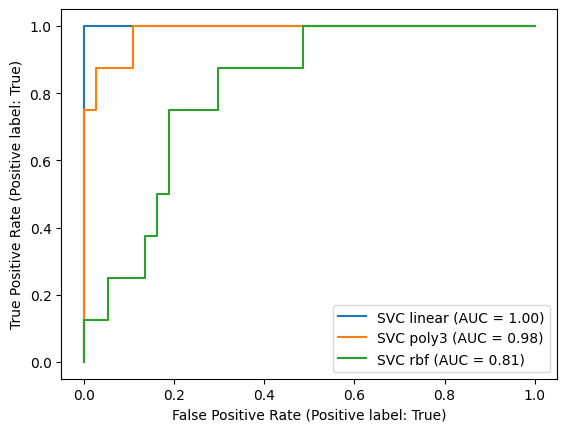

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

fig, ax = plt.subplots() 
svc1 = SVC(kernel='linear')
svc1.fit(X_train, y_train)
RocCurveDisplay.from_estimator(svc1, X_test, y_test, ax=ax, name='SVC linear')

svc2 = SVC(kernel='poly')
svc2.fit(X_train, y_train)
RocCurveDisplay.from_estimator(svc2, X_test, y_test, ax=ax, name='SVC poly3')
svc3 = SVC(kernel='rbf')
svc3.fit(X_train, y_train)
RocCurveDisplay.from_estimator(svc3, X_test, y_test, ax=ax, name='SVC rbf')
plt.show() 

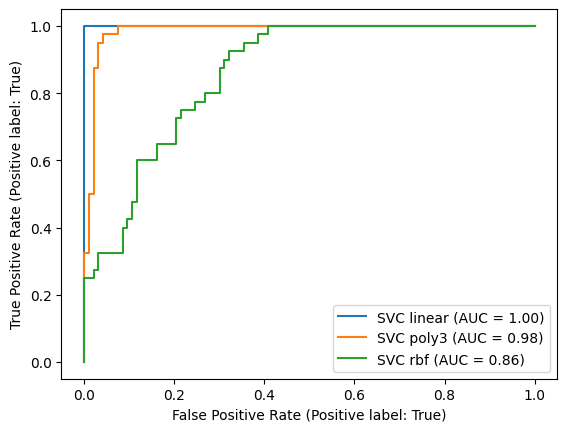

In [107]:
X, y = load_wine(return_X_y=True)
# przechodzimy na klasyfikację binarną
y = y == 2 # klasy 0-1: false, klasa 2: true
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
fig, ax = plt.subplots()
svc1 = SVC(kernel='linear')
svc1.fit(X_train, y_train)
RocCurveDisplay.from_estimator(svc1, X_train, y_train, ax=ax, name='SVC linear')
svc2 = SVC(kernel='poly')
svc2.fit(X_train, y_train)
RocCurveDisplay.from_estimator(svc2, X_train, y_train, ax=ax, name='SVC poly3')
svc3 = SVC(kernel='rbf')
svc3.fit(X_train, y_train)
RocCurveDisplay.from_estimator(svc3, X_train, y_train, ax=ax, name='SVC rbf')
plt.show()

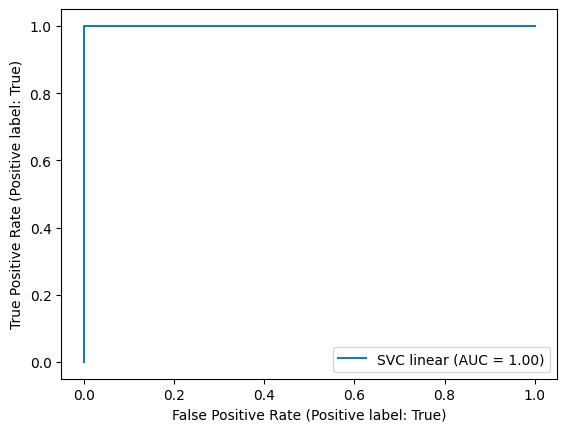

In [108]:
from sklearn.datasets import load_breast_cancer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, cross_val_score

da = LinearDiscriminantAnalysis() # LDA
da.fit(X_train, y_train) # trenowanie klasyfikatora 
#dopasowanie do zbioru treningowego
RocCurveDisplay.from_estimator(svc1, X_train, y_train, name='SVC linear')

plt.show()

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.datasets import make_blobs, make_moons, make_circles
#małe c to szerki margines
#C większe to margines wąski

Klasyfikacja SVM – jak wybierać funkcję jądra oraz parametry klasyfikatora

In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.datasets import make_blobs, make_moons, make_circles

X, y = make_circles(n_samples=200, noise=0.2, factor=0.5, random_state=0)
#X, y = make_moons(n_samples=200, noise=0.3, random_state=0)

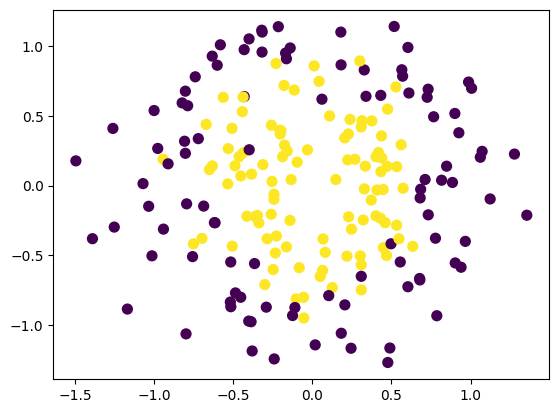

In [111]:
plt.scatter(X[:, 0], X[:, 1], s=50, c=y)
plt.show() 

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
svc = SVC(kernel='rbf', C = 5.0, gamma=2) # rbf, poly, C=?, gamma=?
svc.fit(X_train, y_train)
print('Accuracy (train):', accuracy_score(y_train, svc.predict(X_train)))
print(classification_report(y_test, svc.predict(X_test)))

Accuracy (train): 0.86875
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        22
           1       1.00      0.89      0.94        18

    accuracy                           0.95        40
   macro avg       0.96      0.94      0.95        40
weighted avg       0.95      0.95      0.95        40



In [113]:
# Wyszukiwanie najlepszych parametrów SVM
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(estimator=SVC(), param_grid={'C': [10, 1, 0.1], 'gamma': [1, 10]}, cv=5, verbose=2)
clf.fit(X_train, y_train)
print('Best: ', clf.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ......................................C=10, gamma=1; total time=   0.0s
[CV] END ......................................C=10, gamma=1; total time=   0.0s
[CV] END ......................................C=10, gamma=1; total time=   0.0s
[CV] END ......................................C=10, gamma=1; total time=   0.0s
[CV] END ......................................C=10, gamma=1; total time=   0.0s
[CV] END .....................................C=10, gamma=10; total time=   0.0s
[CV] END .....................................C=10, gamma=10; total time=   0.0s
[CV] END .....................................C=10, gamma=10; total time=   0.0s
[CV] END .....................................C=10, gamma=10; total time=   0.0s
[CV] END .....................................C=10, gamma=10; total time=   0.0s
[CV] END .......................................C=1, gamma=1; total time=   0.0s
[CV] END .......................................C

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
svc = SVC(kernel='rbf', C=0.1, gamma=10) # rbf, poly, C=?, gamma=?
svc.fit(X_train, y_train)
print('Accuracy (train):', accuracy_score(y_train, svc.predict(X_train)))
print(classification_report(y_test, svc.predict(X_test)))


Accuracy (train): 0.875
              precision    recall  f1-score   support

           0       0.85      1.00      0.92        22
           1       1.00      0.78      0.88        18

    accuracy                           0.90        40
   macro avg       0.92      0.89      0.90        40
weighted avg       0.92      0.90      0.90        40



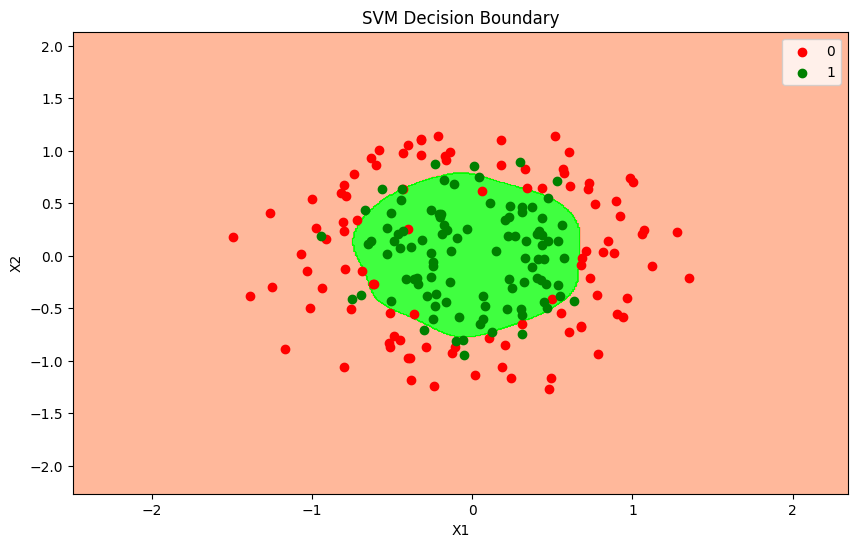

In [115]:
from matplotlib.colors import ListedColormap
# function to plot the decision boundary of the classifier
def plot_decision_boundary(X, y, clf):
    X_set, y_set = X, y
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, 
                                 stop = X_set[:, 0].max() + 1, 
                                 step = 0.01),
                       np.arange(start = X_set[:, 1].min() - 1, 
                                 stop = X_set[:, 1].max() + 1, 
                                 step = 0.01))
    plt.figure(figsize=(10,6))
    plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, 
                cmap = ListedColormap(('lightsalmon', 'lime')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ['red', 'green'][i], label = j)
    plt.title('SVM Decision Boundary')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    return plt.show()
plot_decision_boundary(X, y, svc)

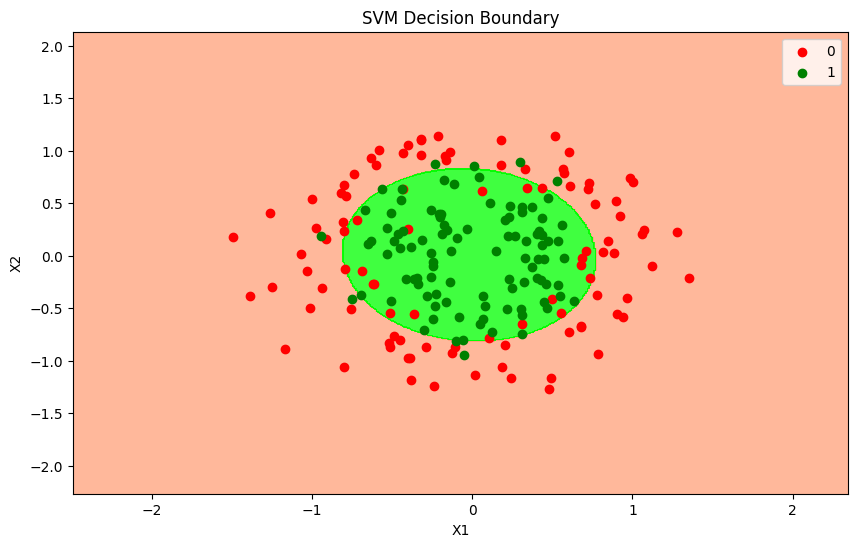

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
svc = SVC(kernel='rbf', C=10, gamma=0.10) # rbf, poly, C=?, gamma=?
svc.fit(X_train, y_train)

plot_decision_boundary(X, y, svc)

In [117]:
# Wyszukiwanie najlepszych parametrów SVM
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(estimator=SVC(), param_grid={'kernel' : ['rbf'], 'C': [1.1, 1.2, 1.3], 'gamma': [1, 10]}, cv=5, verbose=2)
clf.fit(X_train, y_train)

print('Best: ', clf.best_params_)
print('Best: ', clf.best_score_)
print('Best: ', clf.best_estimator_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END .........................C=1.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=1.1, gamma=10, kernel=rbf; total time=   0.0s
[CV] END ........................C=1.1, gamma=10, kernel=rbf; total time=   0.0s
[CV] END ........................C=1.1, gamma=10, kernel=rbf; total time=   0.0s
[CV] END ........................C=1.1, gamma=10, kernel=rbf; total time=   0.0s
[CV] END ........................C=1.1, gamma=10, kernel=rbf; total time=   0.0s
[CV] END .........................C=1.2, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1.2, gamma=1,

PODSUMOWANIE

I. Krok zmienne objaśniające itp

II. Krok sprawdzamy il klas: klasyfikacja binarna,wieloetykietowa itp

III. jak augumentować dane

IV. Jaki zastosujemy klasyfikator? dokonujemy optymalizacji hiperparametrów

V. Zastanawiamy się nas metodą walidacji(można wyk. cross-walidacje, zdefiniować model przez dopasowanie uzycie funkcji fit i zweryfikować na zbiorze testoewym)

VI. Możemy wyświetlić macierz pomyłek ( dow. się ile prawidłowo zaliczonych obiektów), mozemy wyświetlić krzywą ROC ( binarne parametry)

## Drzewa decyzyjne (DT) i lasy losowe (RF)

In [121]:
!pip install graphviz
!pip install -q dtreeviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Przykład 1. Klasyfikacja z wykorzystaniem algorytmu drzew
decyzyjnych

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.model_selection import cross_val_score

Accuracy (mean):  0.9600000000000002


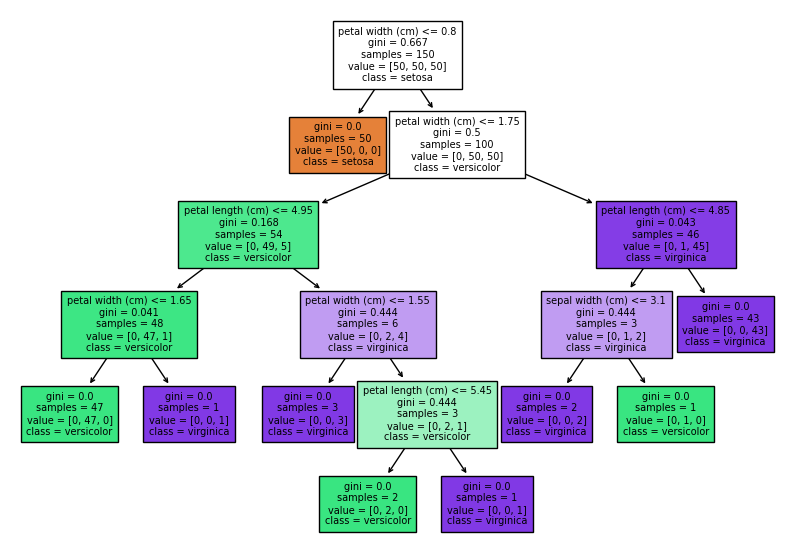

In [123]:
iris = load_iris()
X = iris.data
y = iris.target
clf = tree.DecisionTreeClassifier() # definicja klasyfikatora
scores = cross_val_score(clf, X, y, cv=5) # walidacja krzyżowa
print('Accuracy (mean): ', scores.mean())
clf = clf.fit(X, y) # uczenie klasyfikatora
plt.figure(figsize=(10,7)) #odpowiednio dopasować: figsize, fontsize
tree.plot_tree(clf, fontsize=7, filled=True, feature_names=iris.feature_names, class_names=iris.target_names) #nazwy cech
plt.savefig('DTiris.png') #zapis do pliku
plt.show()
# value = 50 0 0 , czyli class setosa bo 50 dotarło# im więcej obiektów klasy tym większe nasilenie koloru, u nas virginica

In [124]:
import graphviz
dot_data = tree.export_graphviz(clf, # wyświetlenie drzewa decyzyjnego (model dla wszystkich przypadków)
feature_names=iris.feature_names,
class_names=iris.target_names,
filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph #alteranatywnie: display(graph)
4
graph.format = "pdf"
graph.render("DT") #zapis do pliku

'DT.pdf'

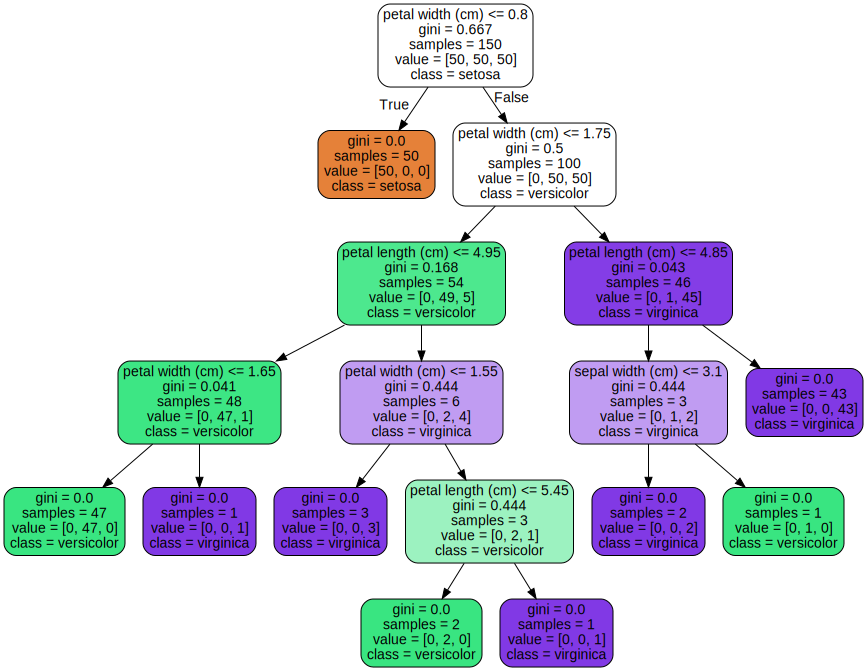

In [125]:
import graphviz
dot_data = tree.export_graphviz(clf, # wyświetlenie drzewa decyzyjnego (model dla wszystkich przypadków)
           feature_names=iris.feature_names,
           class_names=iris.target_names,
           filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph #alteranatywnie: display(graph)

In [126]:
graph.format = "pdf"
graph.render("DT") #zapis do pliku

'DT.pdf'

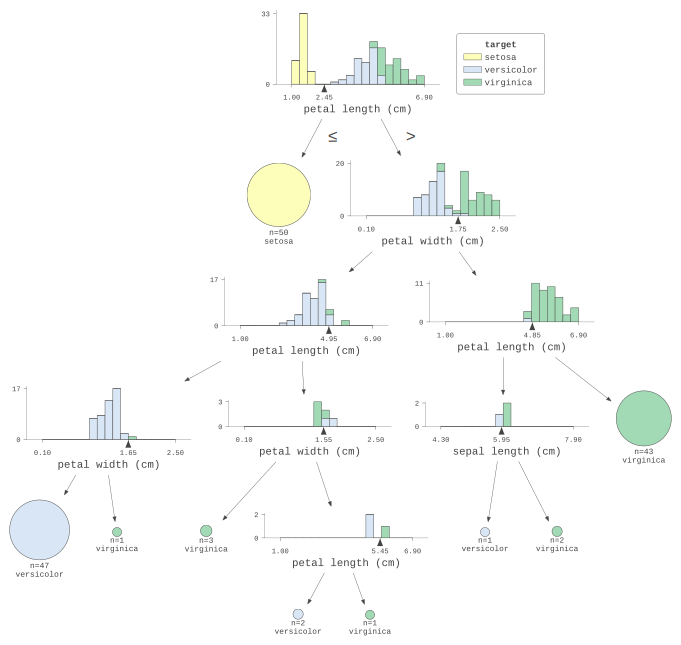

In [127]:
import dtreeviz
clf = tree.DecisionTreeClassifier() # definicja klasyfikatora
clf = clf.fit(X, y)
viz = dtreeviz.model(clf, X, y,
          target_name="target",
          feature_names=iris.feature_names,
class_names=list(iris.target_names))
viz.view(scale=1.2, fontname="Liberation Mono")
#słupk coraz mniejsze, bo zmniejsza się liczba w każdym węźle po podziale na 2